In [13]:
from pathlib import Path
import json
import pandas as pd

In [14]:
def list_json_dir(folder):
    p = Path(folder)

    # list files in dir
    files = [f for f in p.iterdir() if f.suffix == '.json']
    return files

def read_json(f_path):
    with f_path.open('r') as fp:
        json_dict = json.load(fp)
        
    return json_dict

In [15]:
folder = 'results/rq1_2/20201217'
files = list_json_dir(folder)
json_files = [read_json(f) for f in files]
print(json_files[0])

pd_dict = {
    # running parameters
    'preseeding':[],
    'preseeding-minimal':[],
    'sat-polarity':[],
    'postpone_opt':[],
    'postpone_opt_incr':[],
    'postpone_opt_greedy':[],
    'instance':[],
    #'subset_maximal': [],
    'HS':[],
    'HS_greedy':[],
    'HS_incr':[],
    '#expl':[],
    'OUS-time':[],
    'HS-opt-time':[],
    'HS-postpone-time':[],
    'SAT-time':[],
    'timedout':[],
    'config':[],
    'cumul-ous': [],
    'cumul-sat':[],
    'cumul-post':[],
    'cumul-opt':[],
    'cumul-HS': [],
    'cumul-HS-all': [],
}

for f_json in json_files:
    
    for k, v in f_json['config'].items():
        if k not in pd_dict:
            pd_dict[k] = []
        pd_dict[k].append(v)
    for k, v in f_json['results'].items():
        if k == 'timeout':
            pd_dict['timedout'].append(v)
            continue
        if k == 'expl_seq':
            continue
        if k not in pd_dict:
            pd_dict[k] = []

        pd_dict[k].append(v)
    add_configs = [f_json['config']['instance'] if f_json['config']['instance'] != 'origin-problem' else 'puzzle']
    if f_json['config']['preseeding']:
        add_configs.append('pre')
    if f_json['config']['preseeding-minimal']:
        add_configs.append('min')
    if f_json['config']['preseeding-grow']:
        add_configs.append('grow')
    if f_json['config']['preseeding-grow-maxsat']:
        add_configs.append('grow-maxsat')
    if f_json['config']['sat-polarity']:
        add_configs.append('satpol')
    if f_json['config']['postpone_opt']:
        add_configs.append('post')
    if f_json['config']['postpone_opt_incr']:
        add_configs.append('incr')
    if f_json['config']['postpone_opt_greedy']:
        add_configs.append('greedy')
    if f_json['config']['grow_subset_maximal']:
        add_configs.append('subset-max')
    if f_json['config']['grow_maxsat']:
        add_configs.append('MaxSat')
        
    pd_dict['config'].append('_'.join(add_configs))
    pd_dict['cumul-ous'].append( [sum(f_json['results']['OUS-time'][:i+1]) for i in range(len(f_json['results']['OUS-time'])) ])
    pd_dict['cumul-opt'].append( [sum(f_json['results']['HS-opt-time'][:i+1]) for i in range(len(f_json['results']['HS-opt-time'])) ])
    pd_dict['cumul-post'].append( [sum(f_json['results']['HS-postpone-time'][:i+1]) for i in range(len(f_json['results']['HS-postpone-time'])) ])
    pd_dict['cumul-sat'].append( [sum(f_json['results']['SAT-time'][:i+1]) for i in range(len(f_json['results']['SAT-time'])) ])
    pd_dict['cumul-HS'].append( [sum(f_json['results']['HS'][:i+1]) for i in range(len(f_json['results']['HS'])) ])
    pd_dict['cumul-HS-all'].append( [sum(f_json['results']['HS'][:i+1])+sum(f_json['results']['HS_incr'][:i+1])+sum(f_json['results']['HS_greedy'][:i+1]) for i in range(len(f_json['results']['HS'])) ])


#ignored_cols = ['preseeding','preseeding-minimal','sat-polarity','postpone_opt','postpone_opt_incr','postpone_opt_greedy','subset_maximal']
ignored_cols = []
all_cols = [k for k in pd_dict if k not in ignored_cols]
pd_files = pd.DataFrame(pd_dict)
pd_files_cols = pd_files[all_cols]
pd_files_cols

{'config': {'preseeding': True, 'preseeding-minimal': True, 'preseeding-grow': False, 'preseeding-grow-maxsat': False, 'sat-polarity': True, 'postpone_opt': False, 'postpone_opt_incr': False, 'postpone_opt_greedy': False, 'grow': True, 'grow_sat': False, 'grow_subset_maximal': False, 'grow_maxsat': True, 'timeout': 14400, 'instance': 'simple', 'output': 'results/rq1_2/20201217/20201217151209021473.json'}, 'results': {'HS': [3, 2, 1], 'HS_greedy': [0, 0, 0], 'HS_incr': [0, 0, 0], 'HS-opt-time': [0.27704310417175293, 0.0012652873992919922, 0.05320286750793457], 'HS-postpone-time': [0, 0, 0], 'SAT-time': [0.00014352798461914062, 7.2479248046875e-05, 4.57763671875e-05], '#expl': 3, 'expl_seq': [{'constraints': [4], 'derived': [1]}, {'constraints': [1, 5, 6], 'derived': [2]}, {'constraints': [2, 7], 'derived': [-3]}], 'OUS-time': [0.3305673599243164, 0.04259991645812988, 0.05334615707397461], 'timeout': False}}


,preseeding,preseeding-minimal,sat-polarity,postpone_opt,postpone_opt_incr,postpone_opt_greedy,instance,HS,HS_greedy,HS_incr,...,cumul-HS,cumul-HS-all,preseeding-grow,preseeding-grow-maxsat,grow,grow_sat,grow_subset_maximal,grow_maxsat,timeout,output
0,True,True,True,False,False,False,simple,"[3, 2, 1]","[0, 0, 0]","[0, 0, 0]",...,"[3, 5, 6]","[3, 5, 6]",False,False,True,False,False,True,14400,results/rq1_2/20201217/20201217151209021473.json
1,True,False,True,False,False,False,simple,"[1, 3, 1]","[0, 0, 0]","[0, 0, 0]",...,"[1, 4, 5]","[1, 4, 5]",True,False,True,True,False,False,14400,results/rq1_2/20201217/20201217151209021593.json
2,True,False,True,True,True,False,simple,"[1, 3, 1]","[0, 0, 0]","[0, 2, 0]",...,"[1, 4, 5]","[1, 6, 7]",True,False,True,False,False,True,14400,results/rq1_2/20201217/20201217151209021553.json
3,True,False,True,False,False,False,origin-problem,[58],[0],[0],...,[58],[58],True,False,False,False,False,False,60,results/rq1_2/20201217/20201217135811724847.json
4,True,False,True,True,True,False,origin-problem,[18],[0],[917],...,[18],[935],False,True,True,False,True,False,60,results/rq1_2/20201217/20201217135811724866.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,True,False,True,False,False,False,origin-problem,"[35, 41, 6, 17, 22, 3, 8, 16, 2, 14, 20, 1, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[35, 76, 82, 99, 121, 124, 132, 148, 150, 164,...","[35, 76, 82, 99, 121, 124, 132, 148, 150, 164,...",True,False,True,False,True,False,14400,results/rq1_2/20201217/20201217151209021612.json
137,True,True,True,False,False,False,simple,"[3, 20, 3]","[0, 0, 0]","[0, 0, 0]",...,"[3, 23, 26]","[3, 23, 26]",False,False,False,False,False,False,14400,results/rq1_2/20201217/20201217151209021493.json
138,True,False,True,True,True,False,simple,"[1, 2, 1]","[0, 0, 0]","[0, 1, 0]",...,"[1, 3, 4]","[1, 4, 5]",False,True,True,False,True,False,14400,results/rq1_2/20201217/20201217151209021713.json
139,True,False,True,False,False,False,origin-problem,[37],[0],[0],...,[37],[37],True,False,True,False,False,True,60,results/rq1_2/20201217/20201217135811724837.json


In [16]:
pd_files_cols[pd_files_cols['instance'] == 'origin-problem']

,preseeding,preseeding-minimal,sat-polarity,postpone_opt,postpone_opt_incr,postpone_opt_greedy,instance,HS,HS_greedy,HS_incr,...,cumul-HS,cumul-HS-all,preseeding-grow,preseeding-grow-maxsat,grow,grow_sat,grow_subset_maximal,grow_maxsat,timeout,output
3,True,False,True,False,False,False,origin-problem,[58],[0],[0],...,[58],[58],True,False,False,False,False,False,60,results/rq1_2/20201217/20201217135811724847.json
4,True,False,True,True,True,False,origin-problem,[18],[0],[917],...,[18],[935],False,True,True,False,True,False,60,results/rq1_2/20201217/20201217135811724866.json
8,True,True,True,False,False,False,origin-problem,[335],[0],[0],...,[335],[335],False,False,False,False,False,False,60,results/rq1_2/20201217/20201217135811724767.json
11,True,False,True,True,True,False,origin-problem,[50],[0],[459],...,[50],[509],False,True,True,True,False,False,60,results/rq1_2/20201217/20201217135811724856.json
13,True,True,True,False,False,False,origin-problem,"[2256, 1090]","[0, 0]","[0, 0]",...,"[2256, 3346]","[2256, 3346]",False,False,False,False,False,False,14400,results/rq1_2/20201217/20201217151209021493.json
18,True,False,True,False,False,False,origin-problem,[42],[0],[0],...,[42],[42],False,True,True,False,False,True,60,results/rq1_2/20201217/20201217135811724989.json
19,True,False,True,True,True,False,origin-problem,"[21, 7, 10, 2, 4, 5, 7, 1, 2, 8, 1, 3, 11, 85]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[346, 225, 203, 3, 91, 110, 172, 0, 28, 154, 0...",...,"[21, 28, 38, 40, 44, 49, 56, 57, 59, 67, 68, 7...","[367, 599, 812, 817, 912, 1027, 1206, 1207, 12...",True,False,True,False,True,False,14400,results/rq1_2/20201217/20201217151209021534.json
21,True,False,True,True,True,False,origin-problem,"[61, 3, 10, 2, 7, 23, 41, 16, 1, 23, 5, 26, 2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[579, 21, 36, 12, 37, 122, 341, 70, 0, 169, 11...",...,"[61, 64, 74, 76, 83, 106, 147, 163, 164, 187, ...","[640, 664, 710, 724, 768, 913, 1295, 1381, 138...",False,True,True,True,False,False,14400,results/rq1_2/20201217/20201217151209021679.json
24,True,False,True,True,True,False,origin-problem,[6],[0],[183],...,[6],[189],True,False,True,False,True,False,60,results/rq1_2/20201217/20201217135811724787.json
27,True,False,True,True,True,False,origin-problem,[24],[0],[301],...,[24],[325],True,False,False,False,False,False,60,results/rq1_2/20201217/20201217135811724808.json


In [19]:
import matplotlib.pyplot as plt

# Origin problem
def plot_instance_col(df, instance, col):
    df_inst_col = df[df['instance'] == instance][['#expl','config', col]]
    df_inst_col['x'] = df_inst_col[col].apply(lambda x: [i for i in range(1, len(x) + 1)])
    df_inst_col = df_inst_col.sort_values(by=['#expl'], ascending=False)

    plt.figure(figsize=(30,15))
    for i, row in df_inst_col.iterrows():
        plt.plot(row['x'], row[col], label=row['config'])
        
    # Plot formatting
    plt.legend()
    plt.xlabel('Number of explanation steps')
    plt.ylabel('Execution time (s) - timeout [7200s]')
    plt.xlim((0, 50))
    plt.title(instance + " - " + col)
    
    plt.show()


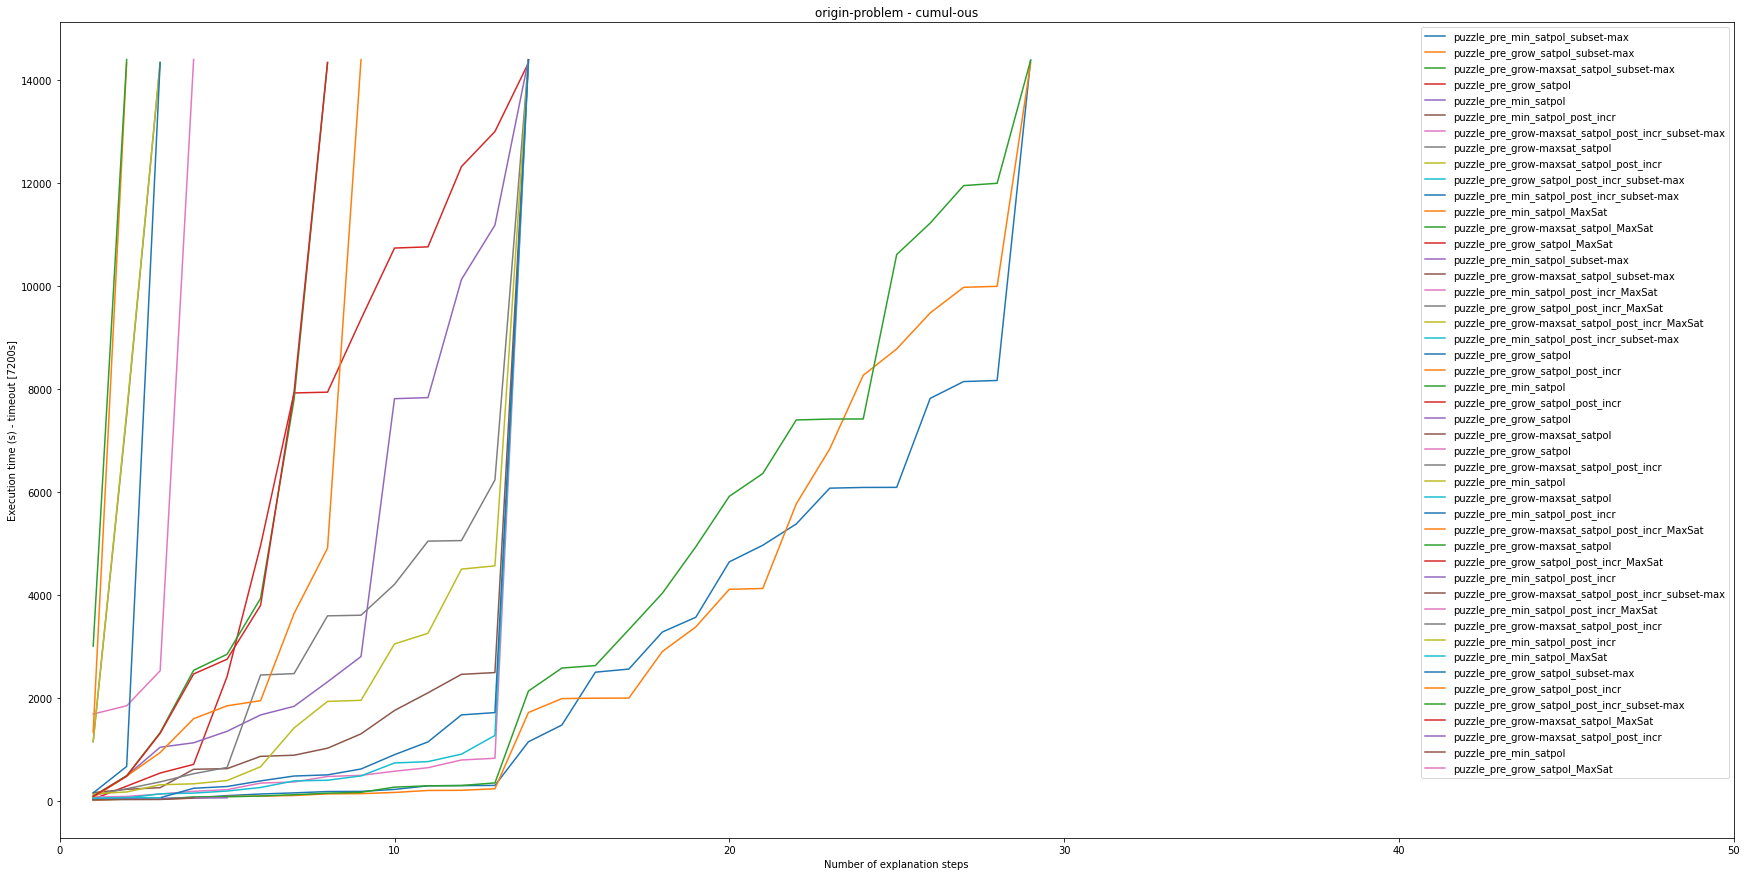

In [20]:
plot_instance_col(pd_files_cols, 'origin-problem', 'cumul-ous')